In [1]:
import datasets
ds = datasets.load_dataset("mikkoim/aquamonitor-jyu", cache_dir="hf")

In [2]:
import pandas as pd
df = pd.read_parquet("https://huggingface.co/datasets/mikkoim/aquamonitor-jyu/resolve/main/aquamonitor-jyu.parquet.gzip")
df_train = df.query("fold0 == 'train'")
df_val = df.query("fold0 == 'val'")

In [ ]:
from aquamonitor import AquaMonitorDataset
am = AquaMonitorDataset(df_train, ds["train"])

Initializing images...


100%|██████████| 40880/40880 [00:00<00:00, 432754.98it/s]


Done. 40880 images.
Initializing imaging runs...


100%|██████████| 1106/1106 [00:05<00:00, 221.16it/s]


Done. 1106 imaging_runs.
Initializing individuals...


100%|██████████| 1049/1049 [00:00<00:00, 156260.43it/s]

Done. 1049 individuals.


In [88]:
individual_id_sample = df_train.sample(10).set_index("individual")

for individual_id in individual_id_sample.index:
    individual = am(individual=individual_id)
individual_id_sample.loc[individual_id]["taxon"] == individual.taxon

True

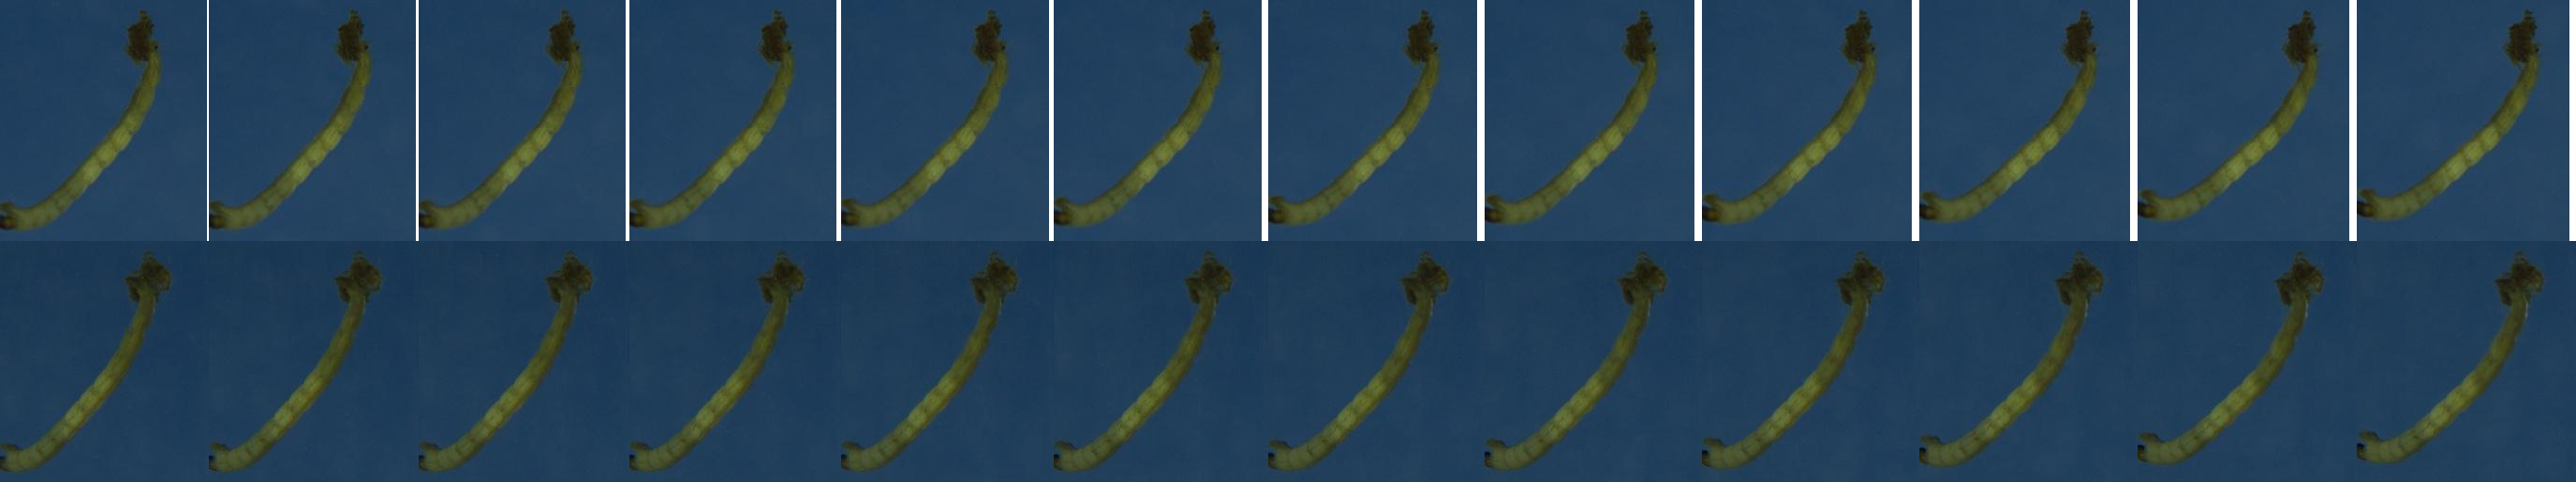

In [74]:
from aquamonitor.utils import stack_images
sample = df_train.sample(1)
imaging_run_id = sample["imaging_run"].iloc[0]

pairs = am.load(imaging_run=imaging_run_id, imagepairs=True)
pair_images = []
for pair in pairs:
    img1 = pair["images"][0]
    img2 = pair["images"][1]
    pair_images.append(stack_images([img1, img2], orientation="vertical"))

stack_images(pair_images, orientation="horizontal")